In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('E:\\Project\\New folder\\housing data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185F51B7B48>,
      dtype=object)

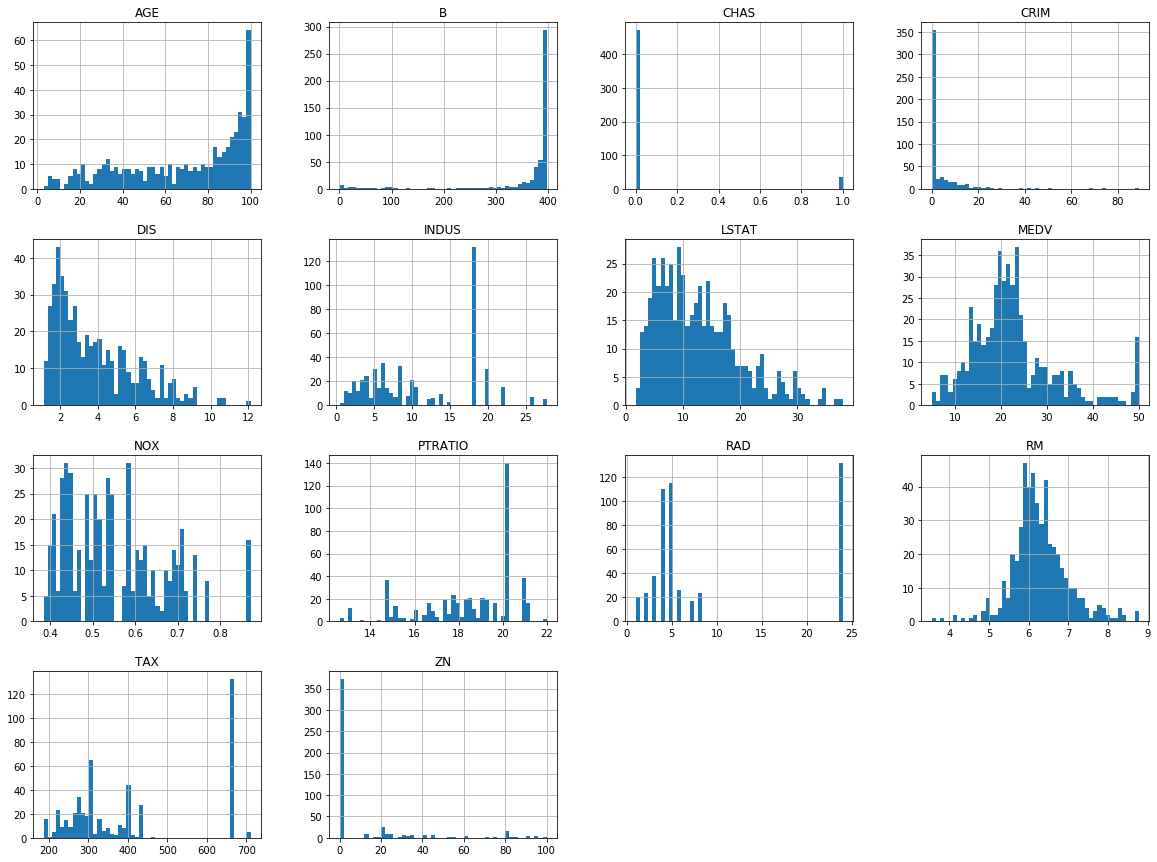

In [8]:
housing.hist(figsize=(20,15), bins=50)

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
train_set['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [11]:
corr_matrix=train_set.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185F8AC3B48>,
      dtype=object)

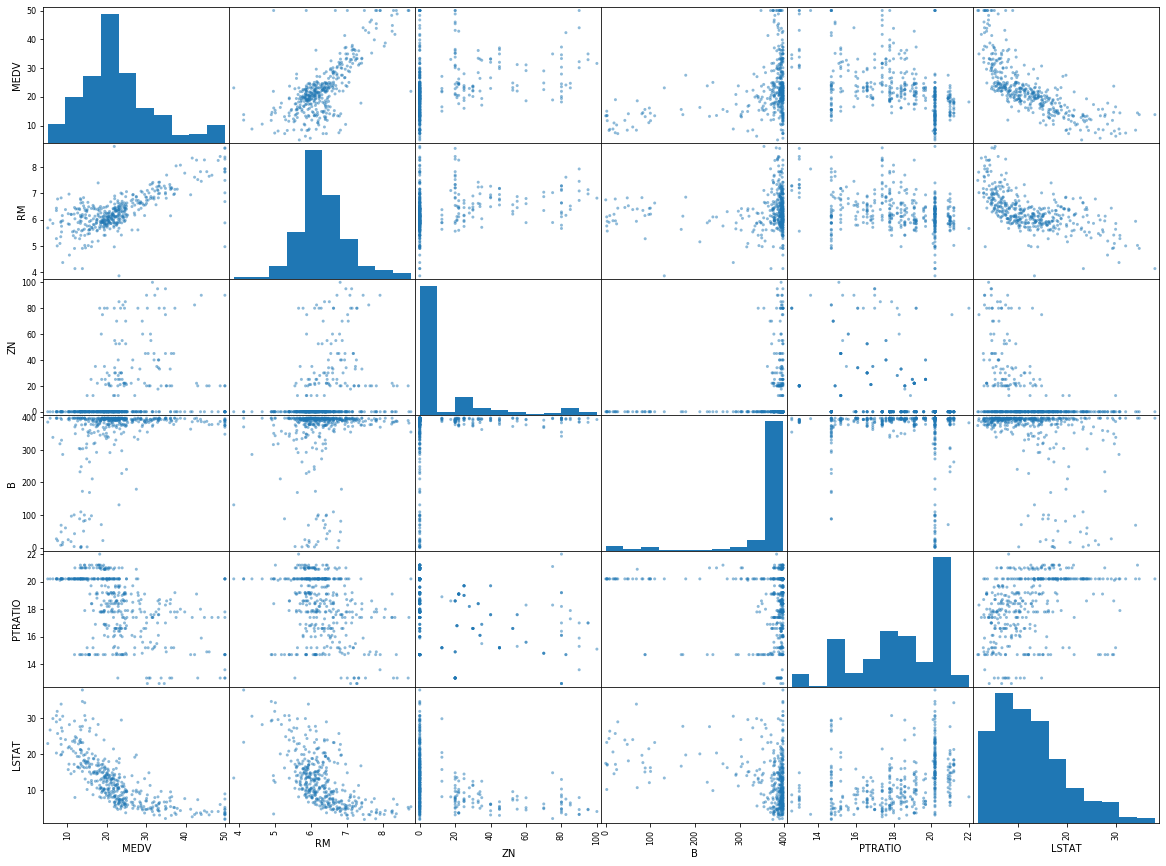

In [12]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','B','PTRATIO','LSTAT']
scatter_matrix(train_set[attributes], figsize=(20,15))

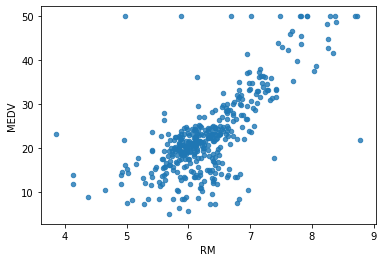

In [13]:
train_set.plot(kind='scatter', x='RM', y='MEDV',alpha=0.8)

In [14]:
housing=train_set.drop('MEDV',axis=1)
housing_labels=train_set['MEDV'].copy()

In [15]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(housing,housing_labels)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,train_set,housing_labels,scoring='neg_mean_squared_error', cv=10)
nmse=np.sqrt(-scores)

In [17]:
nmse.mean()

0.2638957584551966

In [18]:
nmse.std()

0.15079841781563236

In [19]:
from joblib import dump,load
dump(model,'House Prediction Model.joblib')

['House Prediction Model.joblib']

In [20]:
X_test=test_set.drop('MEDV',axis=1)
Y_test=test_set['MEDV'].copy()
prediction=model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
test_mse= mean_squared_error(Y_test,prediction)
test_mse=np.sqrt(test_mse)

In [23]:
test_mse

3.586405158481723